In [1]:
import sys
sys.path.append('../utils')

from util import get_unique_val_count, check_missing_values, imbalance_check, get_max_class, get_outliers, get_unique_cat_val

from util import plot_count, plot_cat_count, plot_num_dist, plot_cat_pie, plot_cat_count_by_var
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

plt.style.use("dark_background")
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False

pd.set_option('display.max_columns', 45)

In [2]:
df_inc = pd.read_csv('../data/income_inequality.csv')
df_inc.head()

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,employment_stat,wage_per_hour,is_labor_union,working_week_per_year,industry_code,industry_code_main,occupation_code,occupation_code_main,total_employed,household_stat,household_summary,under_18_family,veterans_admin_questionnaire,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,NaN,0,0,NaN,52,0,Not in universe or children,0,NaN,2,Householder,Householder,NaN,NaN,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Nonfamily householder,Householder,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,NaN,0,500,No,15,41,Hospital services,26,Adm support including clerical,4,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,2,Single,0,0,0,Native,94,US,US,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Child <18 never marr not in subfamily,Child under 18 never married,Both parents present,NaN,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,NaN,0,0,NaN,0,0,Not in universe or children,0,NaN,0,Spouse of householder,Spouse of householder,NaN,NaN,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [3]:
df_inc.shape

(209499, 43)

In [4]:
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [5]:
data_rows = get_unique_cat_val(df_inc)
for mdict in data_rows:
    print(mdict['col'])
    print('-' * 50)
    print(mdict['unique'])
    print('\n')

ID
--------------------------------------------------
['ID_TZ0000' 'ID_TZ0001' 'ID_TZ0002' ... 'ID_TZ99997' 'ID_TZ99998'
 'ID_TZ99999']


gender
--------------------------------------------------
[' Female' ' Male']


education
--------------------------------------------------
[' High school graduate' ' 12th grade no diploma' ' Children'
 ' Bachelors degree(BA AB BS)' ' 7th and 8th grade' ' 11th grade'
 ' 9th grade' ' Masters degree(MA MS MEng MEd MSW MBA)' ' 10th grade'
 ' Associates degree-academic program' ' 1st 2nd 3rd or 4th grade'
 ' Some college but no degree' ' Less than 1st grade'
 ' Associates degree-occup /vocational'
 ' Prof school degree (MD DDS DVM LLB JD)' ' 5th or 6th grade'
 ' Doctorate degree(PhD EdD)']


class
--------------------------------------------------
[nan ' Federal government' ' Private' ' Local government'
 ' Self-employed-incorporated' ' Self-employed-not incorporated'
 ' State government' ' Without pay' ' Never worked']


education_institute
-----------

In [6]:
# Replace ' ?' with NaN
df_inc.replace({' ?':np.nan}, inplace=True)

In [7]:
check_missing_values(df_inc)

,col,dtype,miss_val,pct_miss_val
0,veterans_admin_questionnaire,object,207415,99.01
1,unemployment_reason,object,202979,96.89
2,education_institute,object,196197,93.65
3,old_residence_state,object,193889,92.55
4,old_residence_reg,object,193148,92.20
5,migration_prev_sunbelt,object,193148,92.20
6,is_labor_union,object,189420,90.42
7,under_18_family,object,151654,72.39
8,migration_code_change_in_reg,object,106284,50.73
9,residence_1_year_ago,object,106284,50.73


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-e

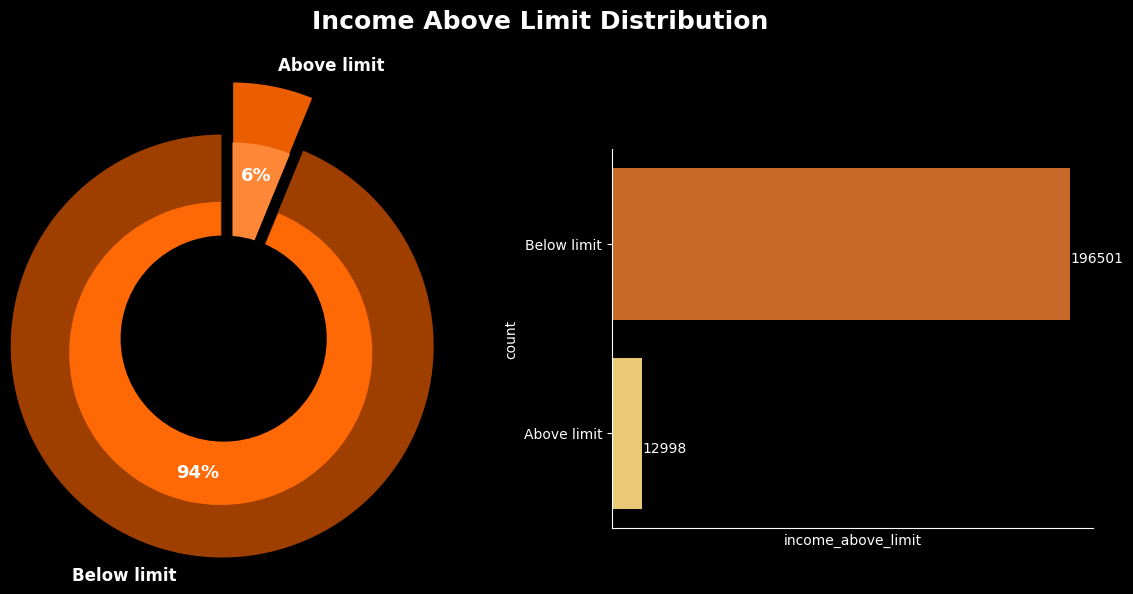

In [8]:
plot_count(df_inc, 'income_above_limit', 'Income Above Limit Distribution')

The dataset is imbalanced. About 94% of the traget variable has the income below limit and only 6% of the data has income above limit. We will need to address imbalanced data. 

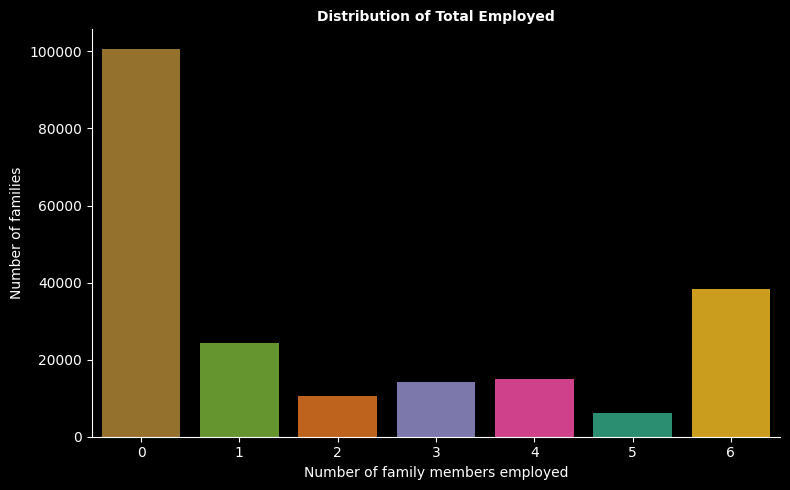

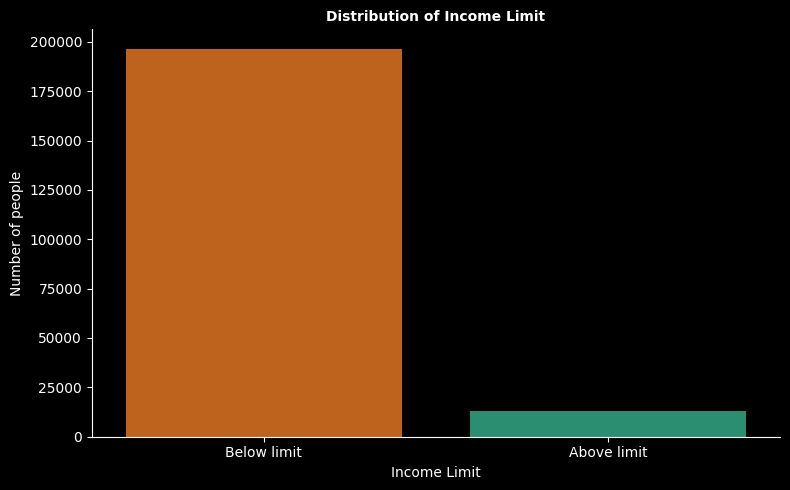

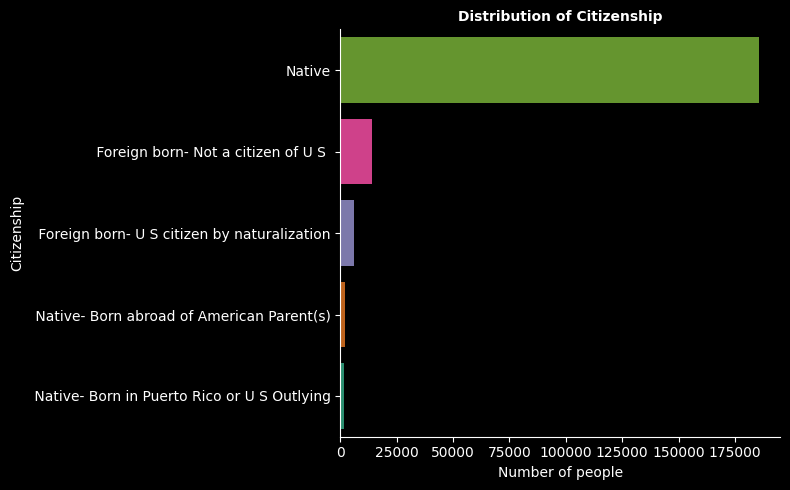

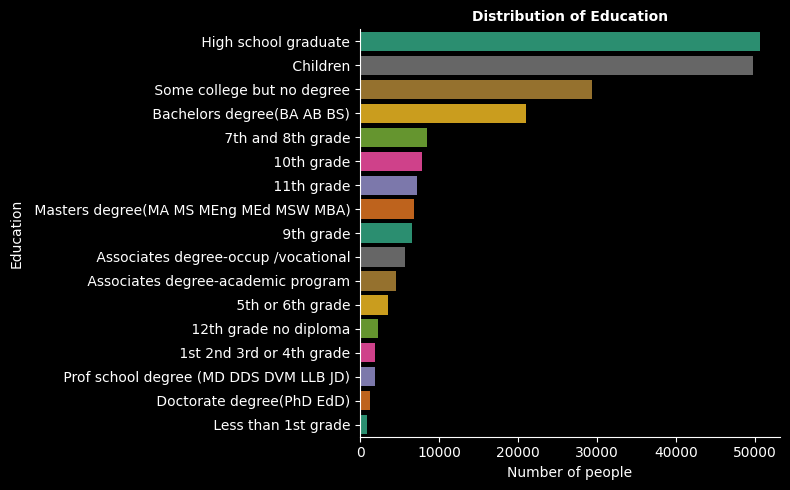

In [9]:
# Count Plots
plot_cat_count(df_inc['total_employed'].value_counts(), x_label='Number of family members employed', y_label='Number of families', title='Distribution of Total Employed')
plot_cat_count(df_inc['income_above_limit'].value_counts(), x_label='Income Limit', y_label='Number of people', title='Distribution of Income Limit')
plot_cat_count(df_inc['citizenship'].value_counts(), x_label='Number of people', y_label='Citizenship', title='Distribution of Citizenship', index_on_x=0)
plot_cat_count(df_inc['education'].value_counts(), x_label='Number of people', y_label='Education', title='Distribution of Education', index_on_x=0)

#### Correlation between Education & Income

Does Education have an impact on income?

In [10]:
df_edu = df_inc.copy(deep=True)
df_edu['education'].value_counts()

education
High school graduate                      50627
Children                                  49685
Some college but no degree                29320
Bachelors degree(BA AB BS)                20979
7th and 8th grade                          8438
10th grade                                 7905
11th grade                                 7260
Masters degree(MA MS MEng MEd MSW MBA)     6861
9th grade                                  6540
Associates degree-occup /vocational        5650
Associates degree-academic program         4494
5th or 6th grade                           3542
12th grade no diploma                      2282
1st 2nd 3rd or 4th grade                   1917
Prof school degree (MD DDS DVM LLB JD)     1852
Doctorate degree(PhD EdD)                  1318
Less than 1st grade                         829
Name: count, dtype: int64

In [11]:
df_edu['education'] = df_edu['education'].str.strip(' ')
df_edu['education'].unique()

array(['High school graduate', '12th grade no diploma', 'Children',
       'Bachelors degree(BA AB BS)', '7th and 8th grade', '11th grade',
       '9th grade', 'Masters degree(MA MS MEng MEd MSW MBA)',
       '10th grade', 'Associates degree-academic program',
       '1st 2nd 3rd or 4th grade', 'Some college but no degree',
       'Less than 1st grade', 'Associates degree-occup /vocational',
       'Prof school degree (MD DDS DVM LLB JD)', '5th or 6th grade',
       'Doctorate degree(PhD EdD)'], dtype=object)

In [12]:
df_edu['education'] = df_edu['education'].replace({'1st 2nd 3rd or 4th grade':'Less than High School',
                             'Less than 1st grade':'Less than High School',
                             '7th and 8th grade':'Less than High School',
                             '5th or 6th grade':'Less than High School',
                             '9th grade':'Less than High School',
                             '10th grade':'Less than High School',
                             '11th grade':'Less than High School'
                             })


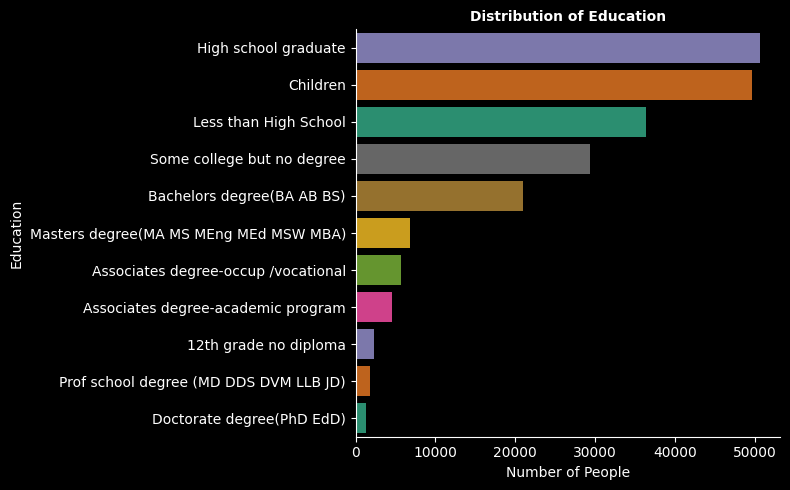

In [13]:
plot_cat_count(df_edu['education'].value_counts(), x_label='Number of People', y_label='Education', title='Distribution of Education', index_on_x=0)

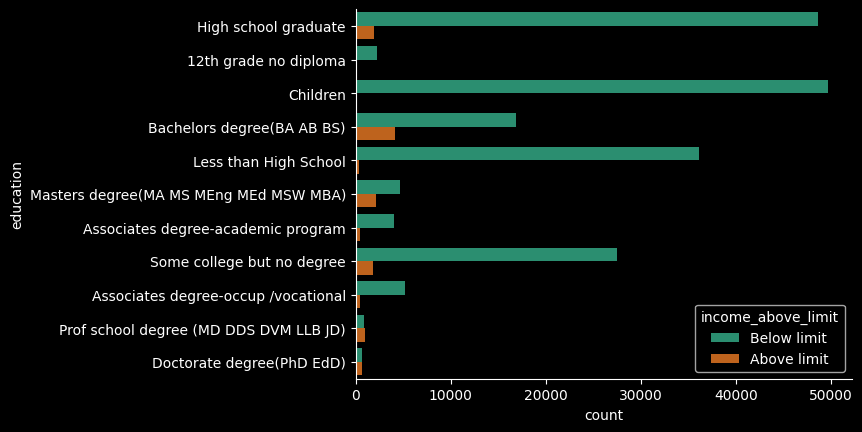

In [14]:
sns.countplot(y='education', hue='income_above_limit', data=df_edu, palette='Dark2')
plt.show()

Majority of people who are below income limit are either - High Schoold graduates or choildren or less than high school or some college but no degree. This suggest that there is a reslationship between education and income. Clearly, the proportion of people with higer degrees and income below limit is very small.


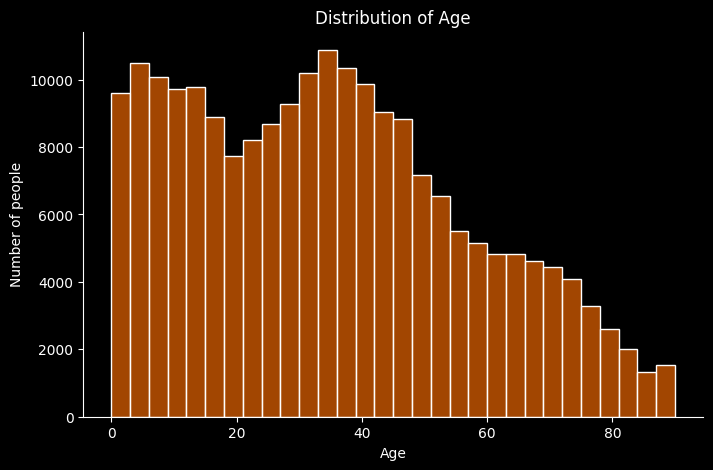

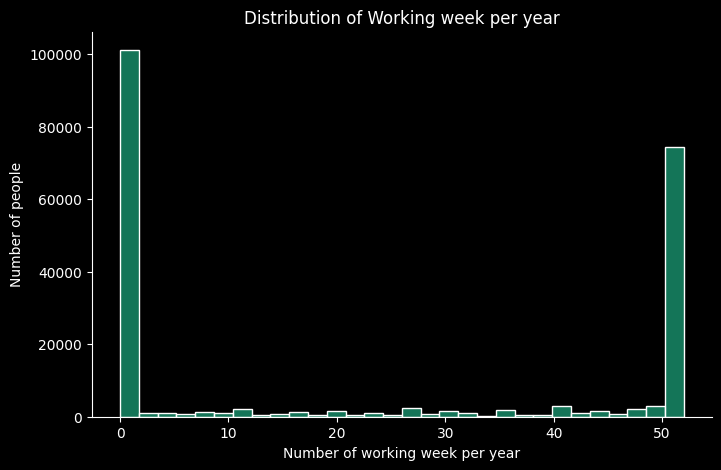

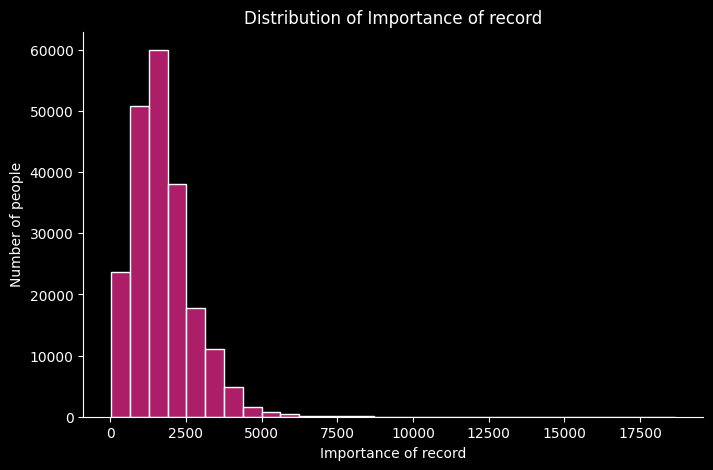

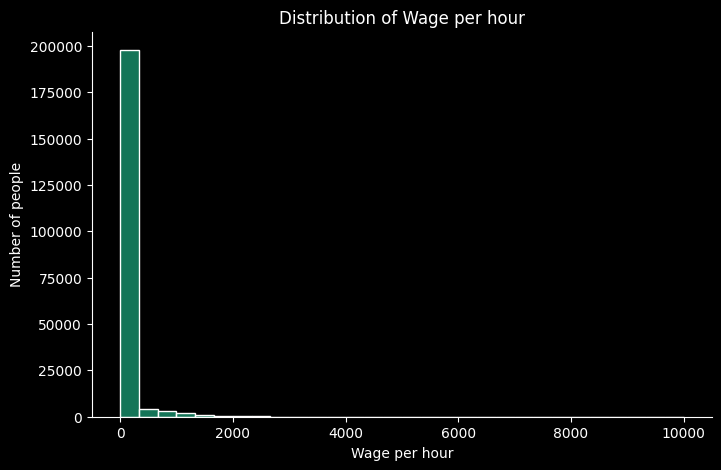

In [15]:
plot_num_dist(df_inc['age'], x_label='Age', y_label='Number of people', title='Distribution of Age')
plot_num_dist(df_inc['working_week_per_year'], x_label='Number of working week per year', y_label='Number of people', title='Distribution of Working week per year')
plot_num_dist(df_inc['importance_of_record'], x_label='Importance of record', y_label='Number of people', title='Distribution of Importance of record')
plot_num_dist(df_inc['wage_per_hour'], x_label='Wage per hour', y_label='Number of people', title='Distribution of Wage per hour')

Distribution of Age is bi-modal. This is because we have a huge number of children in our dataset.

Distribution of working week per year is also bi-modal. Again this is becuase of the children and adults who are unemployed.

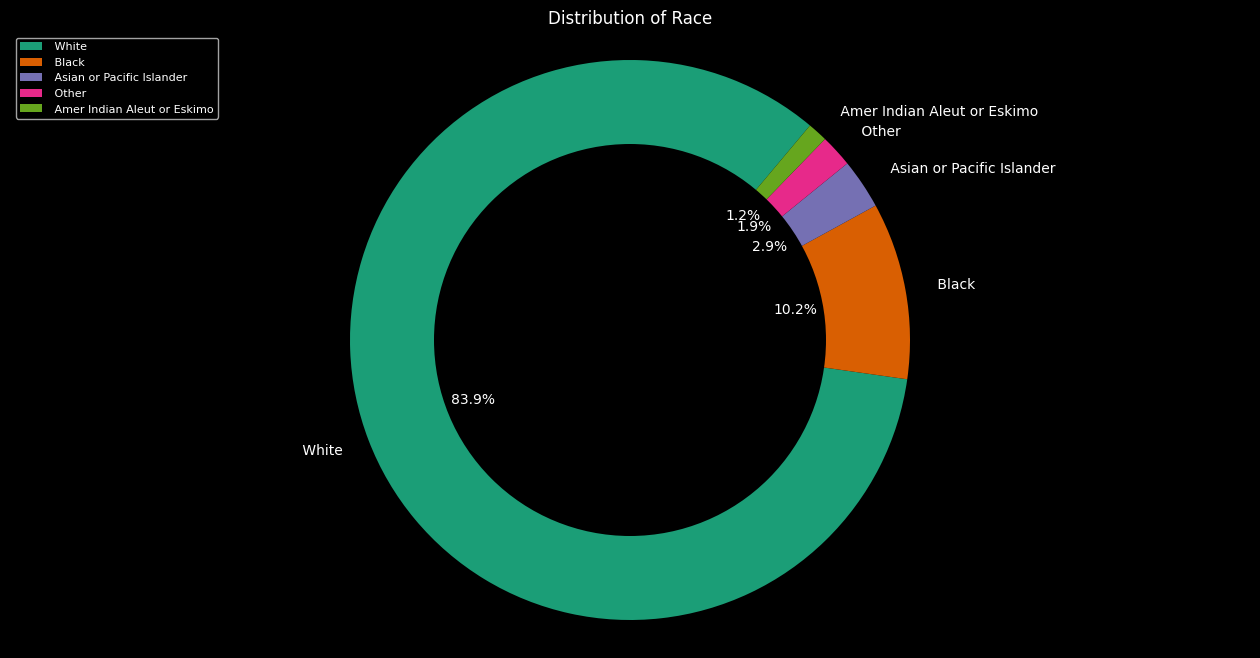

In [16]:
race = df_inc['race'].value_counts()
plot_cat_pie(race, title='Distribution of Race')

In [17]:
print('Percentage of whites below income limit:', round(len(df_inc.loc[(df_inc['race'] == ' White') & (df_inc['income_above_limit'] == 'Below limit')]) / len(df_inc.loc[df_inc['race']==' White']) * 100, 2), '%')
print('Percentage of non-whites below income limit:', round(len(df_inc.loc[(df_inc['race'] != ' White') & (df_inc['income_above_limit'] == 'Below limit')]) / len(df_inc.loc[df_inc['race'] !=' White']) * 100, 2), '%')

Percentage of whites below income limit: 93.26 %
Percentage of non-whites below income limit: 96.57 %


Between whites and non-whites there does not seem any kind of discrimination in terms of incpme below limit

In [18]:
print('Percentage of Males below income limit:', round(len(df_inc.loc[(df_inc['gender'] == ' Male') & (df_inc['income_above_limit'] == 'Below limit')]) / len(df_inc.loc[df_inc['gender']==' Male']) * 100, 2), '%')
print('Percentage of Females below income limit:', round(len(df_inc.loc[(df_inc['gender'] != ' Male') & (df_inc['income_above_limit'] == 'Below limit')]) / len(df_inc.loc[df_inc['gender'] !=' Male']) * 100, 2), '%')

Percentage of Males below income limit: 89.86 %
Percentage of Females below income limit: 97.44 %


More females are earning below the incme limit than males. But since we have more females in the dataset than males and given that the difference is about 8%. It is not susbtantial.

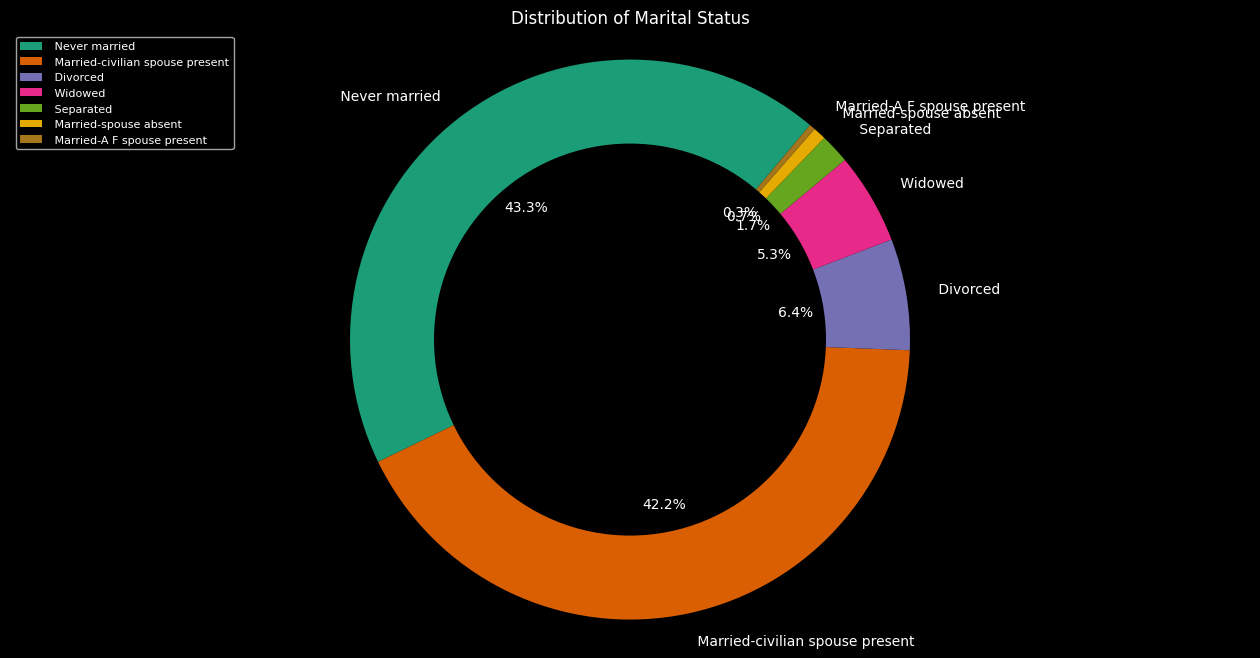

In [19]:
race = df_inc['marital_status'].value_counts()
plot_cat_pie(race, title='Distribution of Marital Status')

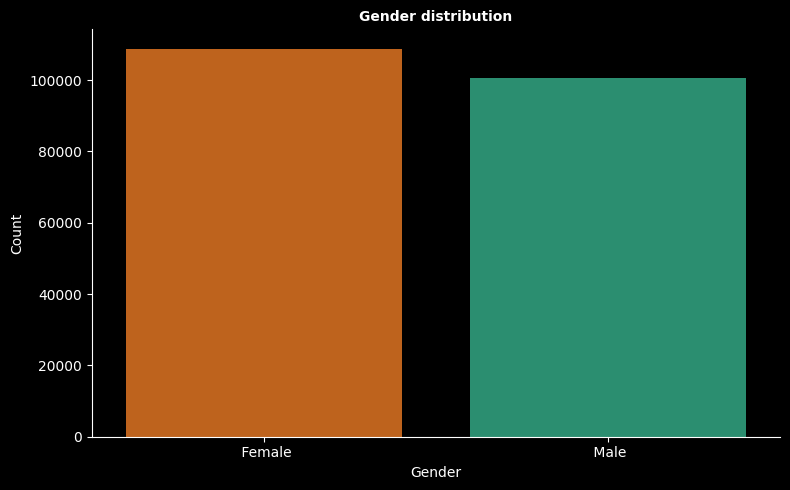

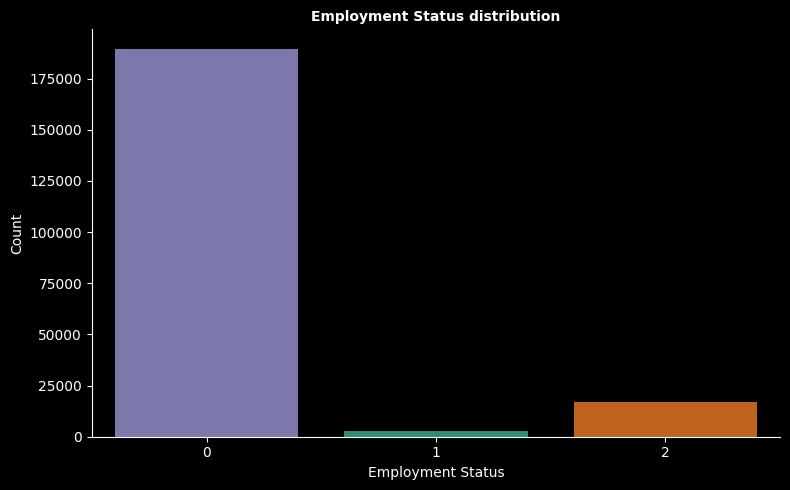

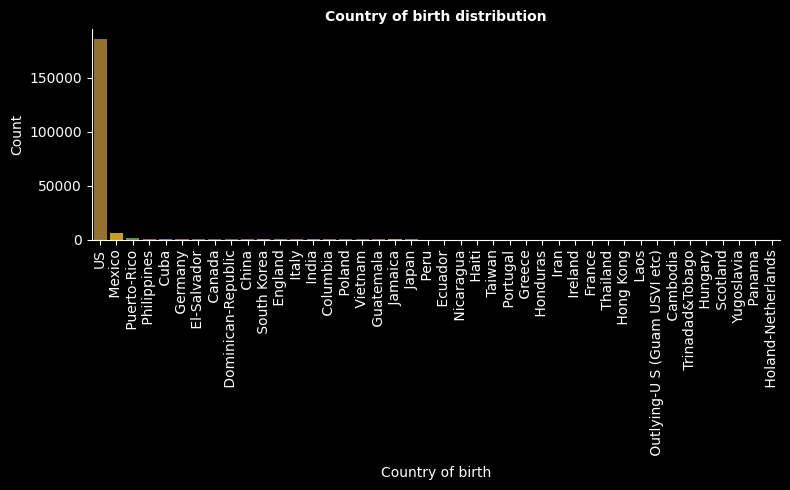

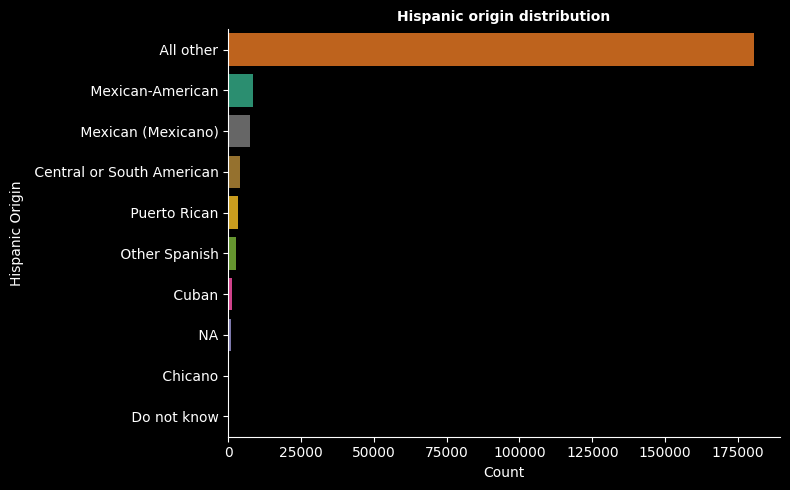

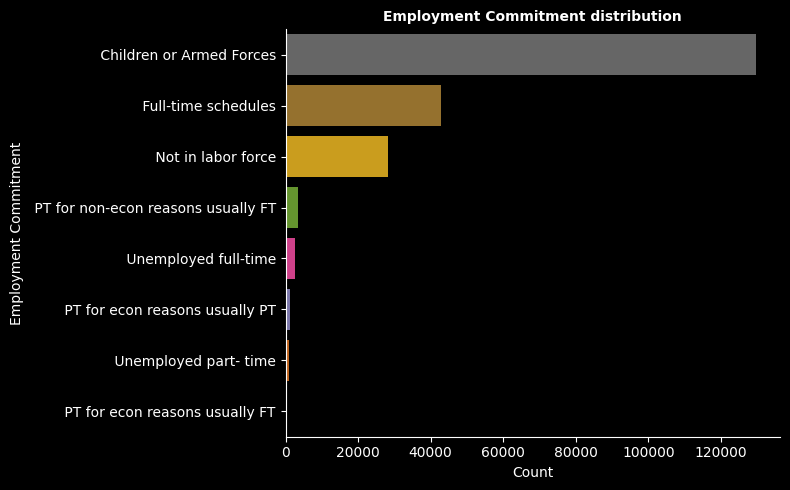

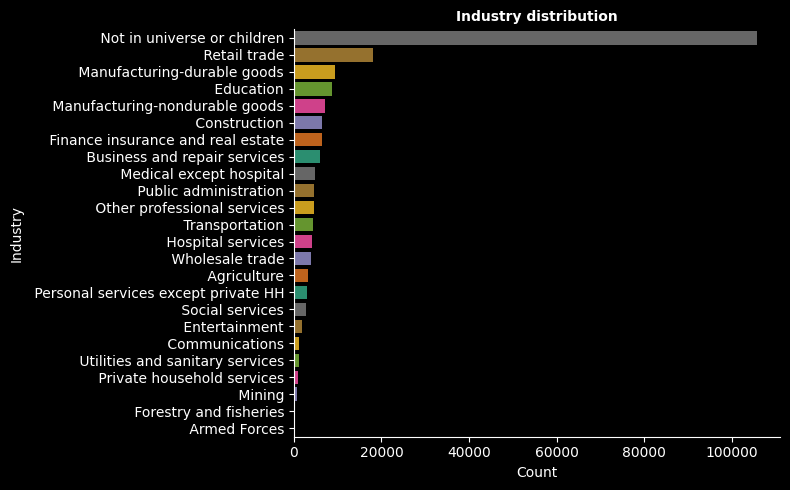

In [20]:
gender = df_inc['gender'].value_counts()
plot_cat_count(gender, x_label='Gender', y_label='Count', title='Gender distribution')

emp = df_inc['employment_stat'].value_counts()
plot_cat_count(emp, x_label='Employment Status', y_label='Count', title='Employment Status distribution')

birth_country = df_inc['country_of_birth_own'].value_counts()
plot_cat_count(birth_country, x_label='Country of birth', y_label='Count', title='Country of birth distribution', xticklbl_rotate=90)

hispanic = df_inc['is_hispanic'].value_counts()
plot_cat_count(hispanic, x_label='Count', y_label='Hispanic Origin', title='Hispanic origin distribution', index_on_x=0)

emp_commit = df_inc['employment_commitment'].value_counts()
plot_cat_count(emp_commit, x_label='Count', y_label='Employment Commitment', title='Employment Commitment distribution', index_on_x=0)

ind = df_inc['industry_code_main'].value_counts()
plot_cat_count(ind, x_label='Count', y_label='Industry', title='Industry distribution', index_on_x=0)

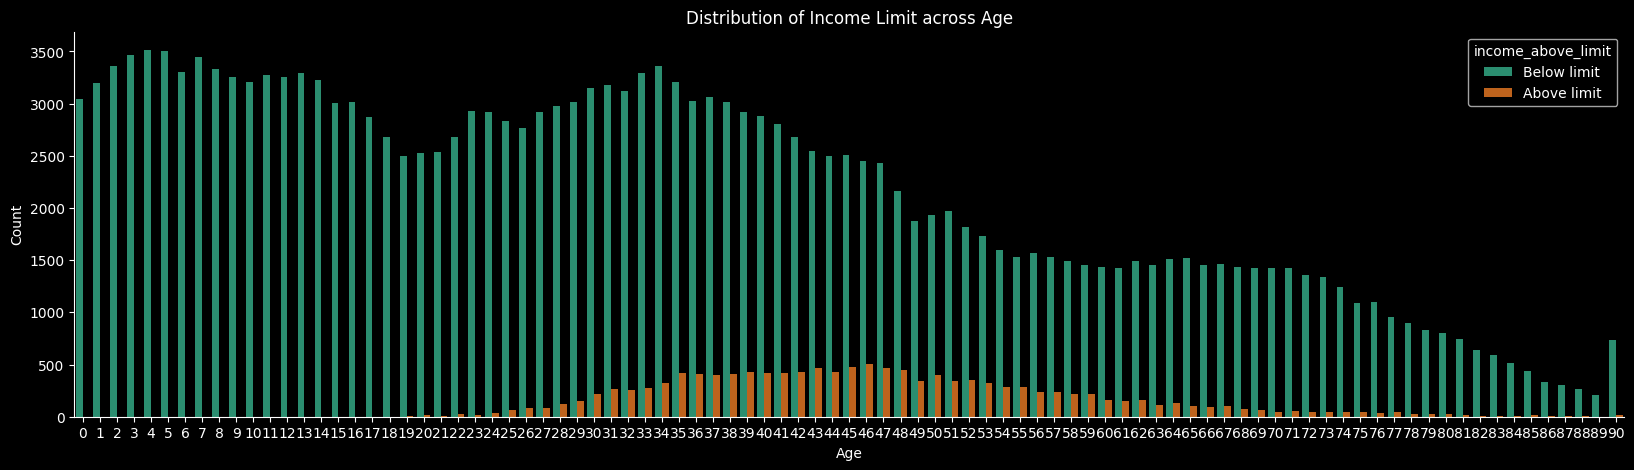

In [21]:
age = df_inc['age']
inc = df_inc['income_above_limit']
plot_cat_count_by_var(ser_data=age, ser_hue=inc, x_label='Age', y_label='Count', title='Distribution of Income Limit across Age')

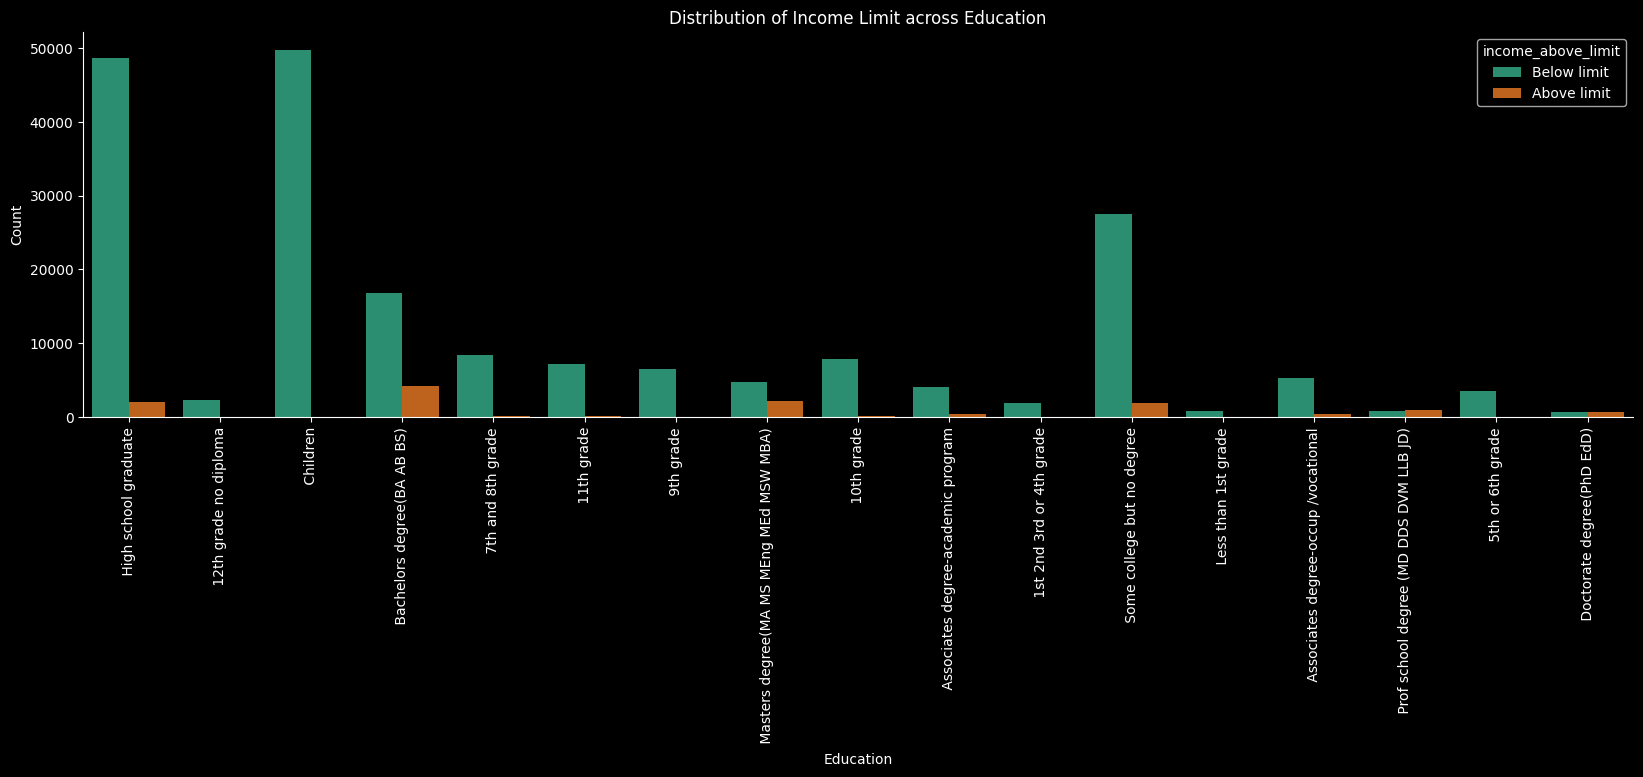

In [22]:
edu = df_inc['education']
plot_cat_count_by_var(ser_data=edu, ser_hue=inc, x_label='Education', y_label='Count', title='Distribution of Income Limit across Education', xticklbl_rotate=90)

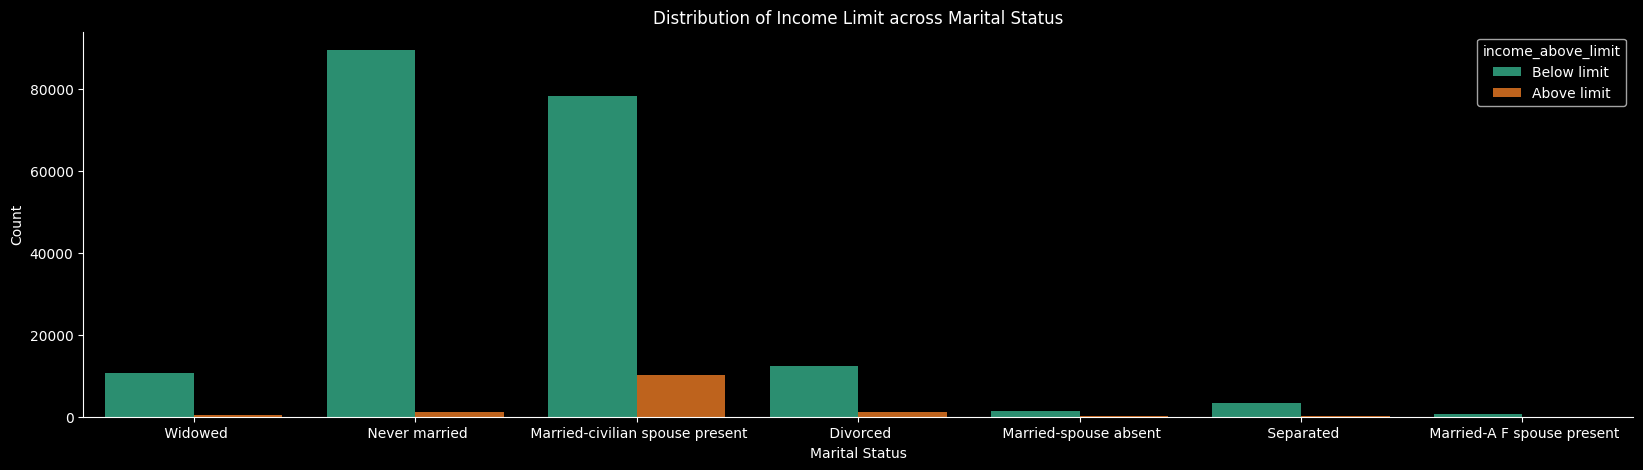

In [23]:
marital = df_inc['marital_status']
plot_cat_count_by_var(ser_data=marital, ser_hue=inc, x_label='Marital Status', y_label='Count', title='Distribution of Income Limit across Marital Status')

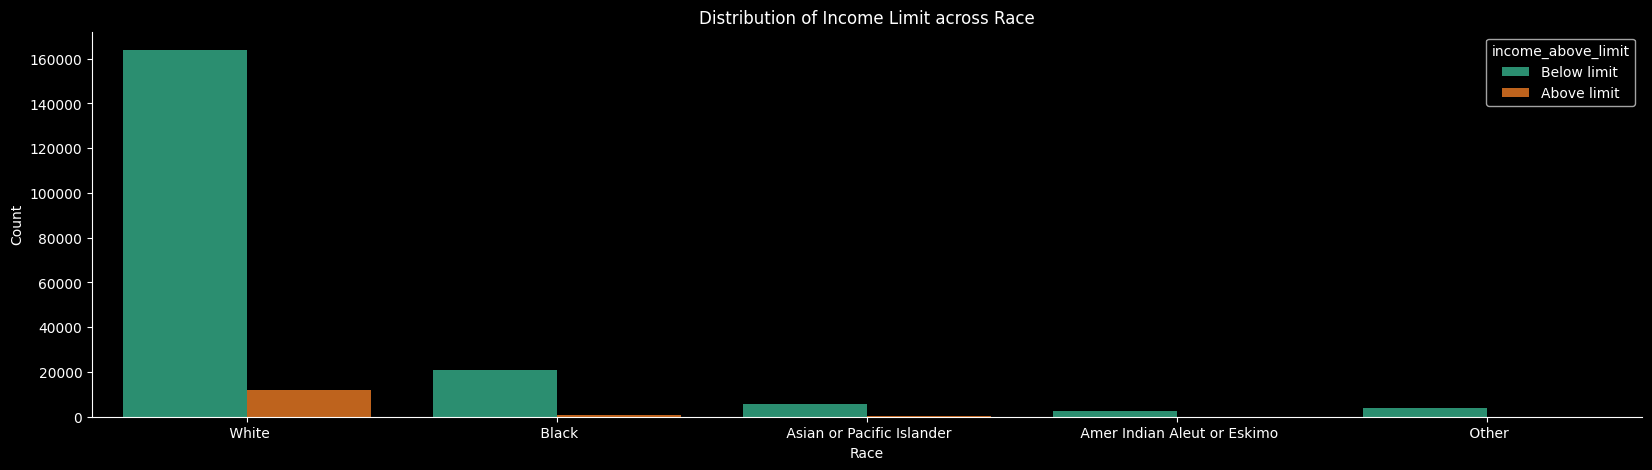

In [24]:
race = df_inc['race']
plot_cat_count_by_var(ser_data=race, ser_hue=inc, x_label='Race', y_label='Count', title='Distribution of Income Limit across Race')

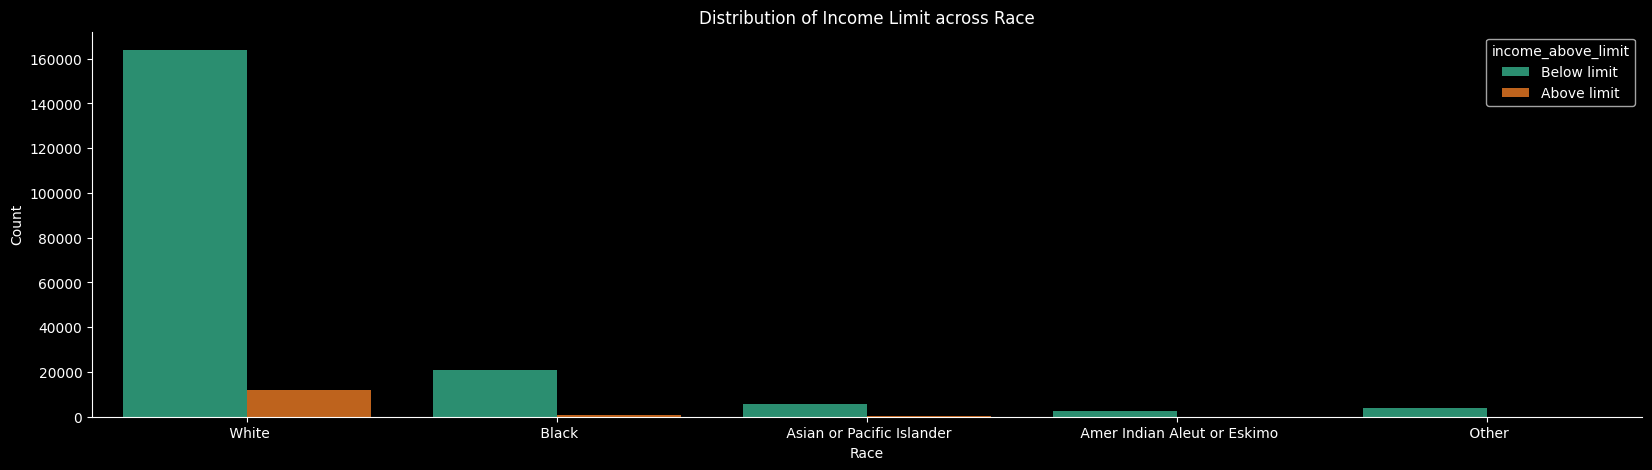

In [25]:
race = df_inc['race']
plot_cat_count_by_var(ser_data=race, ser_hue=inc, x_label='Race', y_label='Count', title='Distribution of Income Limit across Race')

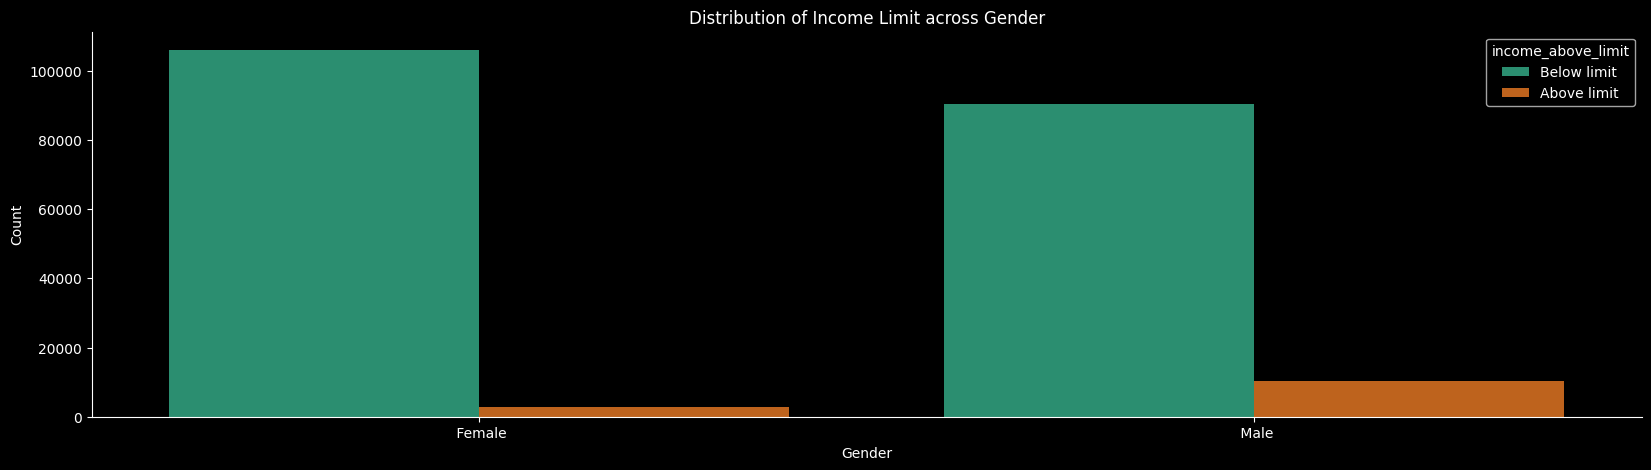

In [26]:
gender = df_inc['gender']
plot_cat_count_by_var(ser_data=gender, ser_hue=inc, x_label='Gender', y_label='Count', title='Distribution of Income Limit across Gender')

Pairplot

In [27]:
# sns.pairplot(df_inc)
# plt.show()

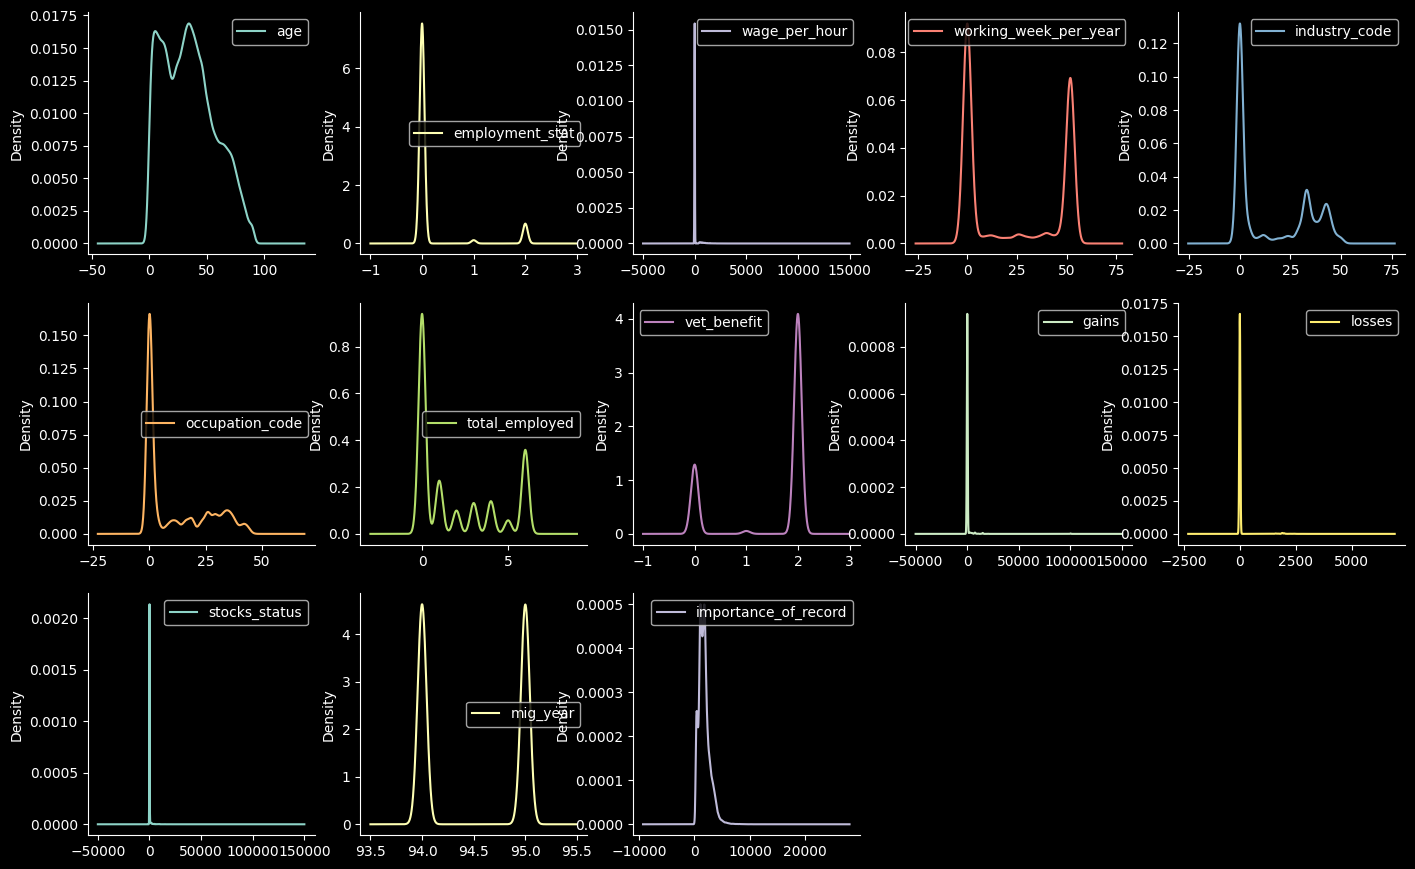

In [28]:
df_inc.plot(kind="density", 
                subplots=True, 
                layout = (6,5), 
                figsize=(17,22), 
                sharex=False, 
                sharey=False);

As we can see above, most distibutions are bi-modal.

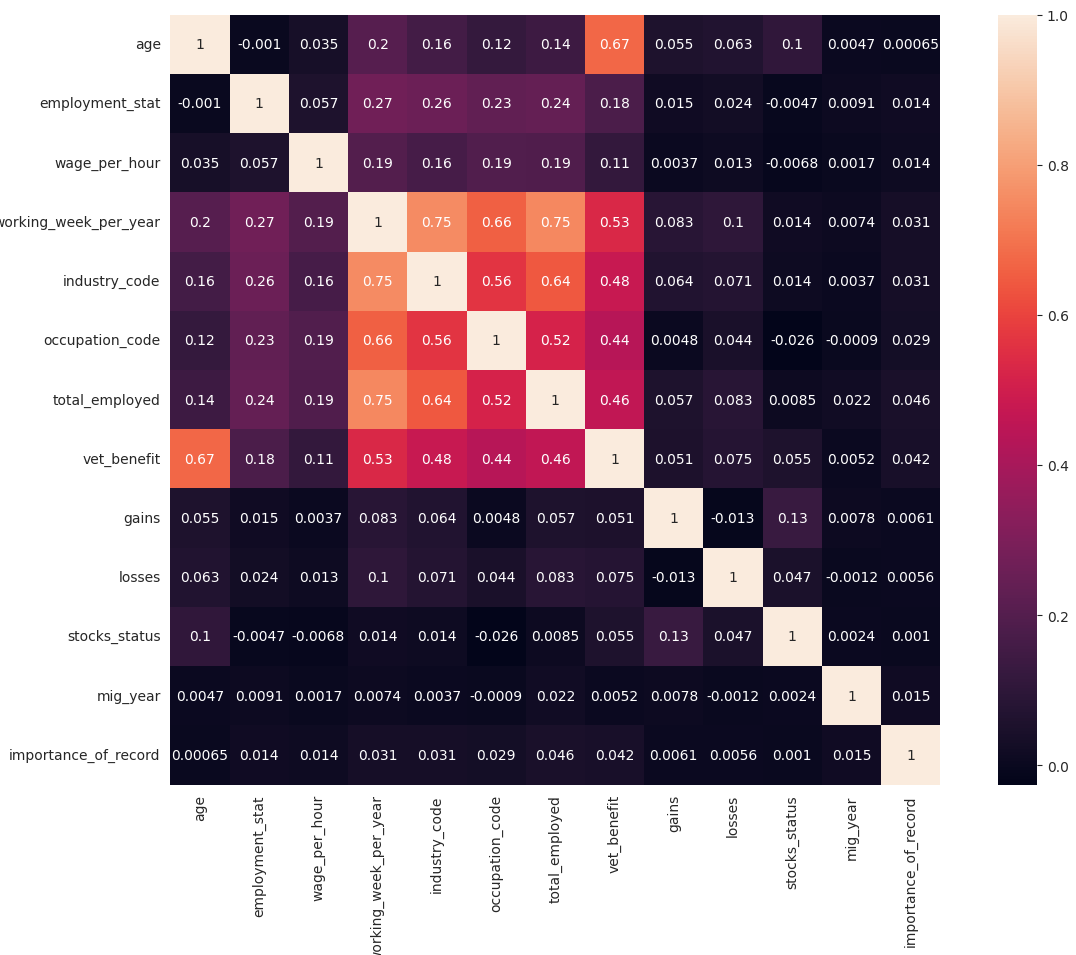

In [29]:
num_idx = df_inc.select_dtypes(include=['number']).columns
corr = df_inc[num_idx].corr(method='pearson')

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, square=True, annot=True)
plt.show()